# Aula 1 - Explorando dados com Pandas

In [1]:
# Importando a biblioteca pandas
import pandas as pd

In [2]:
# Definindo o dataframe do link como a variável 'df'
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
# Leitura incial do conteúdo do dataframe
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [4]:
# Descrição geral do conteúdo do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
# Dados estatísticos básicos sobre o dataframe (apenas colunas numéricas)
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# Exibe o número de linhas e colunas, respectivamente
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas: ", linhas)
print("colunas: ", colunas)

linhas:  133349
colunas:  11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
# Tradução do título das colunas com o auxílio de IA
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'moeda_salario': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'salario_usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'taxa_remota',
    'localizacao_da_empresa': 'empresa',
    'company_size': 'tamanho_empresa'
    }

df.rename(columns = renomear_colunas, inplace = True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salary', 'moeda',
       'salario_usd', 'residencia', 'taxa_remota', 'company_location',
       'tamanho_empresa'],
      dtype='object')

In [10]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df['taxa_remota'].value_counts()

,count
taxa_remota,
0,105312
100,27718
50,319


In [13]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [14]:
# Substituindo os nomes das categorias na coluna de senioridade
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
})
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [15]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
})
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [16]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
})
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [17]:
df['taxa_remota'] = df['taxa_remota'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})
df['taxa_remota'].value_counts()

,count
taxa_remota,
Presencial,105312
Remoto,27718
Híbrido,319


In [18]:
df.head(10)

,ano,senioridade,contrato,cargo,salary,moeda,salario_usd,residencia,taxa_remota,company_location,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
5,2025.0,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,Médio
6,2025.0,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Médio
7,2025.0,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Médio
8,2025.0,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Médio
9,2025.0,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Médio


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ano               133339 non-null  float64
 1   senioridade       133349 non-null  object 
 2   contrato          133349 non-null  object 
 3   cargo             133349 non-null  object 
 4   salary            133349 non-null  int64  
 5   moeda             133349 non-null  object 
 6   salario_usd       133349 non-null  int64  
 7   residencia        133349 non-null  object 
 8   taxa_remota       133349 non-null  object 
 9   company_location  133349 non-null  object 
 10  tamanho_empresa   133349 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 11.2+ MB


In [20]:
df.describe(include = object)

,senioridade,contrato,cargo,moeda,residencia,taxa_remota,company_location,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
df.describe()

,ano,salary,salario_usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Limpando e preparando os dados

In [22]:
# checando células nulas
df.isnull()

,ano,senioridade,contrato,cargo,salary,moeda,salario_usd,residencia,taxa_remota,company_location,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.head()

,ano,senioridade,contrato,cargo,salary,moeda,salario_usd,residencia,taxa_remota,company_location,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [24]:
# Verificando a somatória de células nulas em cada coluna
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salary,0
moeda,0
salario_usd,0
residencia,0
taxa_remota,0
company_location,0


In [25]:
# Checando os elementos existentes na coluna 'ano'
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [26]:
# Filtrando os elementos da coluna 'ano' onde o valor é nulo
df[df.isnull().any(axis = 1)]

,ano,senioridade,contrato,cargo,salary,moeda,salario_usd,residencia,taxa_remota,company_location,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [27]:
# Exemplificando o preenchimento de células nulas com a média e mediana
import numpy as np

df_salarios = pd.DataFrame({
    "nome": ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    "salario": [4000, np.nan, 5000, np.nan, 100000 ]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios


,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [28]:
# Exemplificando o preenchimento de células nulas com as células anteriores

df_temperaturas = pd.DataFrame({
    "Dia": ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()


df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [29]:
# Exemplificando o preenchimento de células nulas com as células posteriores

df_temperaturas = pd.DataFrame({
    "Dia": ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()


df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [30]:
# Exemplificando o preenchimento de células nulas com um valor fixo

df_cidades = pd.DataFrame({
    "nome": ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    "cidade": ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [31]:
# Gerando uma nova variável sem as células de valores não informados
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salary,0
moeda,0
salario_usd,0
residencia,0
taxa_remota,0
company_location,0


In [32]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salary,moeda,salario_usd,residencia,taxa_remota,company_location,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [33]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ano               133339 non-null  float64
 1   senioridade       133339 non-null  object 
 2   contrato          133339 non-null  object 
 3   cargo             133339 non-null  object 
 4   salary            133339 non-null  int64  
 5   moeda             133339 non-null  object 
 6   salario_usd       133339 non-null  int64  
 7   residencia        133339 non-null  object 
 8   taxa_remota       133339 non-null  object 
 9   company_location  133339 non-null  object 
 10  tamanho_empresa   133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [34]:
# Transformando as variáveis da coluna ano de float para int
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ano               133339 non-null  int64 
 1   senioridade       133339 non-null  object
 2   contrato          133339 non-null  object
 3   cargo             133339 non-null  object
 4   salary            133339 non-null  int64 
 5   moeda             133339 non-null  object
 6   salario_usd       133339 non-null  int64 
 7   residencia        133339 non-null  object
 8   taxa_remota       133339 non-null  object
 9   company_location  133339 non-null  object
 10  tamanho_empresa   133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3 - Criando gráficos e contando histórias com os dados

In [35]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salary,moeda,salario_usd,residencia,taxa_remota,company_location,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

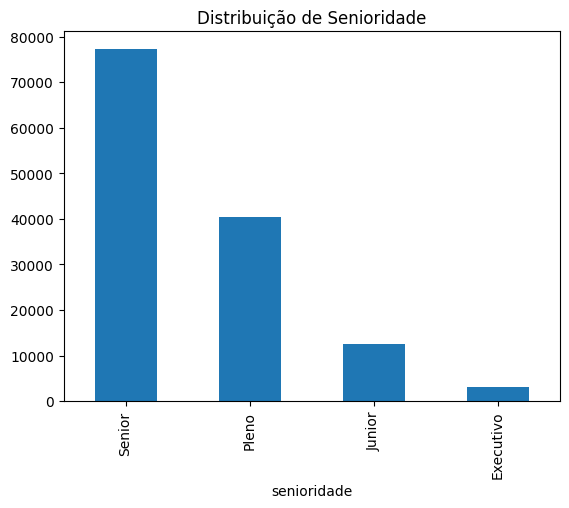

In [36]:
# Criando um gráfico com Pandas, mostrando a frequência dos itens na coluna 'Senioridade'
df_limpo['senioridade'].value_counts().plot(kind = 'bar', title = 'Distribuição de Senioridade')

In [37]:
# Utilizando a biblioteca Seaborn para ampliar as possibilidades de gráficos
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='salario_usd'>

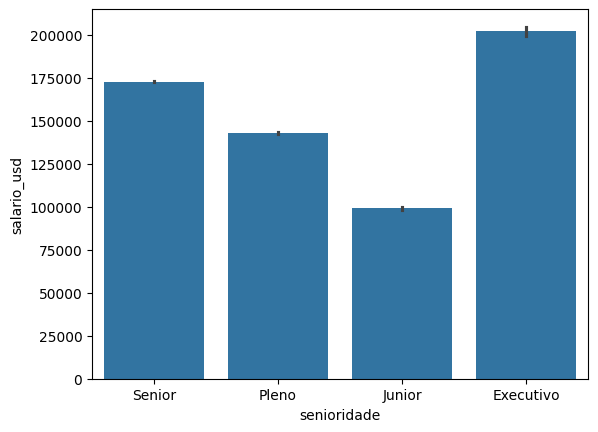

In [38]:
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_usd')

In [39]:
# Utilizando a biblioteca matplolib para ampliar as possibilidades de gráficos
import matplotlib.pyplot as plt

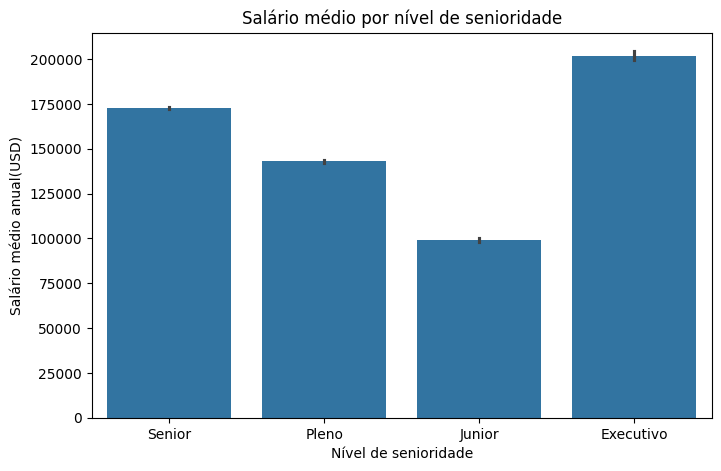

In [40]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_usd')
plt.title("Salário médio por nível de senioridade")
plt.xlabel("Nível de senioridade")
plt.ylabel("Salário médio anual(USD)")
plt.show()

In [41]:
df_limpo.groupby('senioridade')['salario_usd'].mean().sort_values(ascending = True)
ordem = df_limpo.groupby('senioridade')['salario_usd'].mean().sort_values(ascending = True).index
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

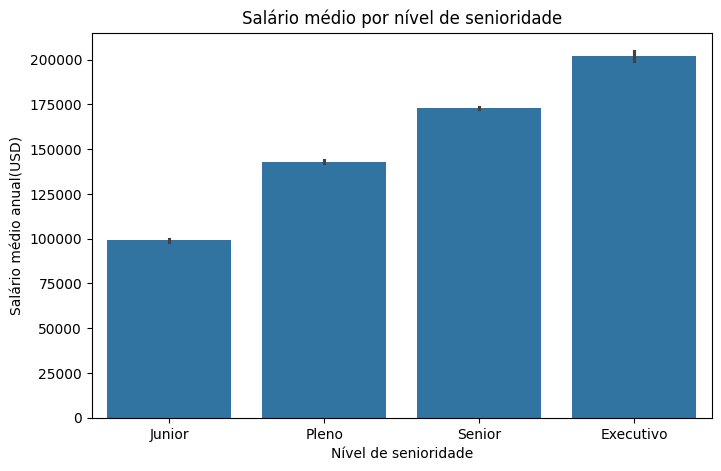

In [42]:
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_usd', order = ordem)
plt.title("Salário médio por nível de senioridade")
plt.xlabel("Nível de senioridade")
plt.ylabel("Salário médio anual(USD)")
plt.show()

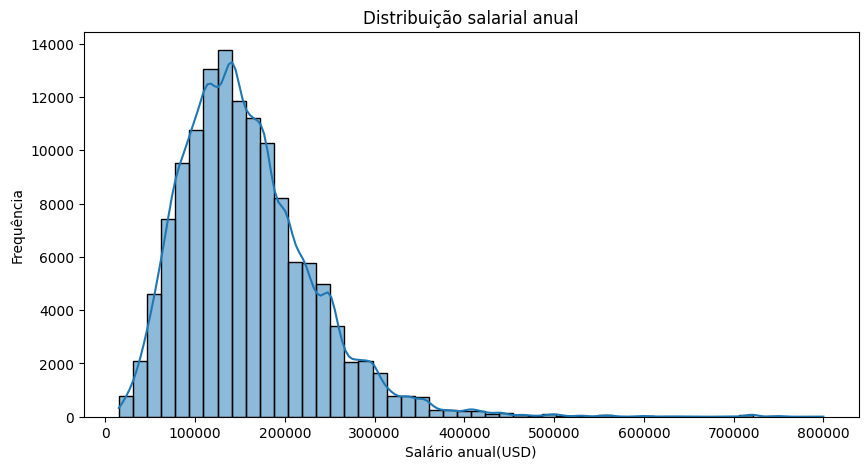

In [43]:
# Produzindo um histograma
plt.figure(figsize = (10,5))
sns.histplot(df_limpo['salario_usd'], bins = 50, kde = True)
plt.title("Distribuição salarial anual")
plt.xlabel("Salário anual(USD)")
plt.ylabel("Frequência")
plt.show()

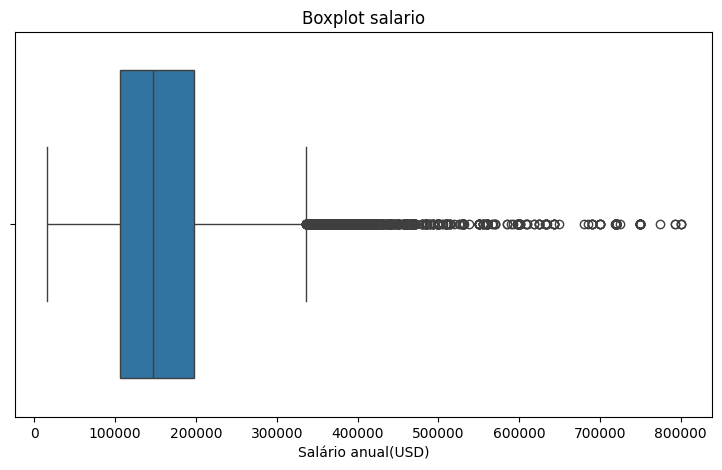

In [44]:
# Produzindo um boxplot
plt.figure(figsize = (9,5))
sns.boxplot(x = df_limpo['salario_usd'])
plt.title("Boxplot salario")
plt.xlabel("Salário anual(USD)")
plt.show()

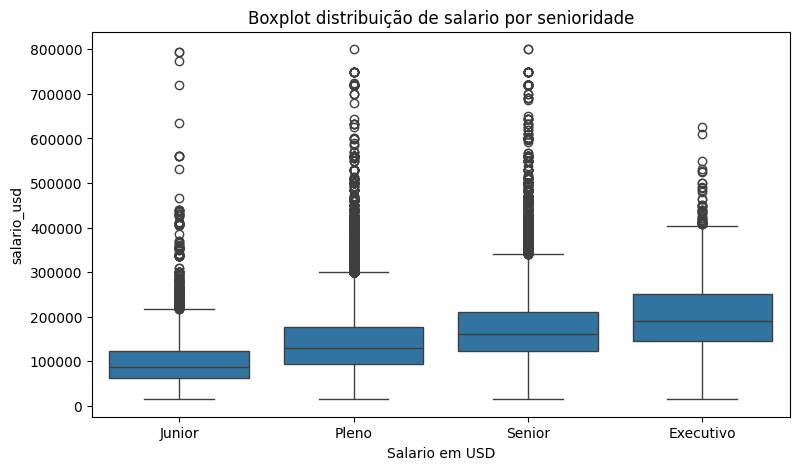

In [45]:
# Produzindo um boxplot por senioridade
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize = (9,5))
sns.boxplot(x = 'senioridade', y = 'salario_usd', data = df_limpo, order = ordem_senioridade)
plt.title("Boxplot distribuição de salario por senioridade")
plt.xlabel("Salario em USD")
plt.show()

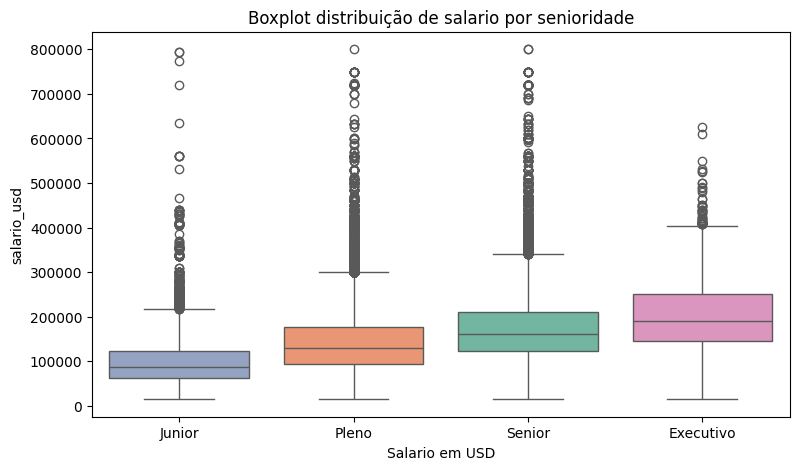

In [46]:
# Adicionando cores ao boxplot
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize = (9,5))
sns.boxplot(x = 'senioridade', y = 'salario_usd', data = df_limpo, order = ordem_senioridade, palette = "Set2", hue = 'senioridade')
plt.title("Boxplot distribuição de salario por senioridade")
plt.xlabel("Salario em USD")
plt.show()

In [47]:
# Importando gráficos interativos
import plotly.express as px

In [48]:
# Criando um gráfico de média salarial por senioridade em barras usando plotly
df_avg_salary_seniority = df_limpo.groupby('senioridade')['salario_usd'].mean().sort_values(ascending=False).reset_index()


fig = px.bar(df_avg_salary_seniority, x='senioridade', y='salario_usd',
             title='Média Salarial por Nível de Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'salario_usd': 'Média Salarial Anual (USD)'})
fig.show()

In [49]:
remoto_contagem = df_limpo['taxa_remota'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção por tipo de trabalho',
             hole = 0.5,
             )

fig.update_traces(textinfo = 'percent+label')
fig.show()

In [50]:
# Desafio salario de data cientist médio por país

In [54]:
# 1º Criando um gráfico de média salarial por cargo
df_avg_salary_job = df_limpo.groupby('cargo')['salario_usd'].mean().sort_values(ascending=True).reset_index()


fig = px.bar(df_avg_salary_job, x='salario_usd', y='cargo',
             title='Média Salarial por cargo',
             labels={'salario_usd': 'Média Salarial Anual (USD)','cargo': 'Cargo'})
fig.show()

In [52]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salary,moeda,salario_usd,residencia,taxa_remota,company_location,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [57]:
df_limpo['cargo'].value_counts()

,count
cargo,
Data Scientist,17311
Software Engineer,15006
Data Engineer,14868
Data Analyst,12381
Engineer,9454
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [59]:
# Filtrando o dataframe para apenas Data Scientists e calculando a média salarial por país
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']
df_avg_salary_country = df_data_scientist.groupby('company_location')['salario_usd'].mean().sort_values(ascending=False).reset_index()

# Criando o gráfico de média salarial de Data Scientist por país usando plotly
fig = px.bar(df_avg_salary_country, x='company_location', y='salario_usd',
             title='Média Salarial de Data Scientists por País',
             labels={'company_location': 'País', 'salario_usd': 'Média Salarial Anual (USD)'},
             color='company_location', color_continuous_scale=px.colors.sequential.Viridis) # Using a sequential color scale
fig.show()

In [60]:
# Filtrando o dataframe para apenas Data Scientists e calculando a média salarial por país
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']
df_avg_salary_country = df_data_scientist.groupby('company_location')['salario_usd'].mean().sort_values(ascending=False).reset_index()

# Criando o gráfico de média salarial de Data Scientist por país usando plotly
fig = px.bar(df_avg_salary_country, x='company_location', y='salario_usd',
             title='Média Salarial de Data Scientists por País',
             labels={'company_location': 'País', 'salario_usd': 'Média Salarial Anual (USD)'})
fig.show()